<h1 style='text-align: center'>ISFA - M2 ES - EQUADE</h1>
<h4 style='text-align: center; margin-top:1%'> DATA MINING AVANCE - PARTIE 2 </h4>
<h4 style='text-align: center; margin-top:1%'></h4>
<h1 style='text-align: center; margin-top:1%'><b>Projet DMA-TD2 <b> </h1>
<h4 style='text-align: center; margin-top:1%'></h4>
<h4 style='text-align: center; margin-top:1%'>Students : </h4>
<h4 style='text-align: center; margin-top:1%'>           Crésus KOUNOUDJI</h4>
<h4 style='text-align: center; margin-top:1%'>           Josué NASSA</h4>
<h4 style='text-align: center; margin-top:1%'>           Madany DIALLO</h4>
<h4 style='text-align: center; margin-top:1%'></h4>
<h4 style='text-align: center; margin-top:1%'>Professeure : Nassira
CHEKKAI</h4>

<h1 style='text-align: center'> Les données:</h1>

<br><br>
Le de jeu de données utilisé dans ce projet est issue des jeux de données GroupLens  <a href='https://www.kaggle.com/datasets/shubhammehta21/movie-lens-small-latest-dataset' target='_blank'>Kaggle : Movie Lens Small Latest Dataset</a> de la plateforme Kaggle et décrit l'activité d'évaluation 5 étoiles et de marquage en texte libre de MovieLens, un service de recommandation de films. Il contient 100836 évaluations et 3683 applications de tags sur 9742 films. Ces données ont été créées par 610 utilisateurs entre le 29 mars 1996 et le 24 septembre 2018. Cet ensemble de données a été généré le 26 septembre 2018.

Les utilisateurs ont été sélectionnés au hasard. Tous les utilisateurs sélectionnés ont évalué au moins 20 films. Aucune information démographique n'est incluse. Chaque utilisateur est représenté par un identifiant et aucune autre information n'est fournie.

Les données sont contenues dans les fichiers links.csv, movies.csv, ratings.csv et tags.csv. Vous trouverez ci-dessous plus de détails sur le contenu et l'utilisation de ces fichiers.

Il s'agit d'un ensemble de données en cours de développement. En tant que tel, il peut changer au fil du temps et n'est pas un ensemble de données approprié pour partager des résultats de recherche. Consultez les jeux de données de référence disponibles si tel est votre objectif.</a>. 
<br><br>

### Introduction : 

Problématique du projet :
Le projet vise à analyser les avis des utilisateurs sur des films à partir du jeu de données "ratings.csv". L'objectif est de créer un système de recommandation de films en utilisant les techniques de similarité entre utilisateurs basées sur les évaluations.

Objectifs :
1. Importer le fichier "ratings.csv" contenant les avis des utilisateurs sur les films.
2. Prétraiter les données pour les rendre appropriées à l'analyse.
3. Construire un graphe de similarité entre les utilisateurs à l'aide des techniques de similarité (cosinus, Jaccard, Pearson).
4. Utiliser le graphe pour générer des recommandations de films personnalisées pour chaque utilisateur.
5. Évaluer les performances du système de recommandation en mesurant la précision et la pertinence des recommandations.

Résultats et conclusions :
En analysant les avis des utilisateurs sur les films, nous avons pu générer un système de recommandation personnalisé. Les techniques de similarité nous ont permis de trouver des utilisateurs ayant des goûts similaires, ce qui a été utilisé pour suggérer des films aux utilisateurs en fonction des évaluations des autres utilisateurs similaires.

Les résultats obtenus ont montré que le système de recommandation basé sur les similarités entre utilisateurs peut fournir des recommandations pertinentes et adaptées aux préférences individuelles. Cela peut améliorer l'expérience des utilisateurs en leur suggérant des films qu'ils sont susceptibles d'apprécier, ce qui peut augmenter leur engagement et leur satisfaction.

Cependant, il convient de noter que les performances du système de recommandation dépendent de la qualité des données et de la pertinence des mesures de similarité utilisées. Une exploration plus approfondie des données et des techniques de recommandation avancées peuvent améliorer davantage les résultats obtenus.

En conclusion, ce projet démontre l'application pratique des techniques de similarité et de recommandation pour analyser les avis des utilisateurs sur les films. Il met en évidence la valeur de l'analyse des données pour fournir des recommandations personnalisées, ce qui peut être appliqué dans divers domaines tels que l'industrie du divertissement, le commerce électronique et la personnalisation des services.

### Importation de paquets utiles

In [1]:
#construction et gestion des arrays
import numpy as np
#construction et gestion de base de données
import pandas as pd
#gestion de l'aléa
import random
#matices creuse
from scipy.sparse import csr_matrix
#construction d'images
import matplotlib.pyplot as plt

#similarité
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import pairwise_distances
#graph et analyse matrice de similarité
import networkx as nx
from networkx.algorithms import bipartite
#detection de communauté dans les réseaux
from community import community_louvain


### Projet DMA - Partie 1 :

#### 1.1 - Importation du fichier ratings.csv

In [2]:
#définir le chemin d'accès pour les données d'entrée et de sortie
input_data = "./data/"
output_data = "./output/"
# Charger le fichier ratings.csv
print("Chargement de la base de données...")
df_ratings = pd.read_csv(input_data+'ratings.csv')
# aperçu les premières lignes du dataframe
df_ratings.head()

Chargement de la base de données...


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


- Vérification du type des données et gestion des données manquantes s'il y a besoin

In [3]:
# Création du tableau des types de données et des valeurs manquantes
data_info = pd.DataFrame(
    {"Type de données": df_ratings.dtypes, 
     "Nombre de valeurs manquantes": df_ratings.isnull().sum()})
# Affichage des types de données et des valeurs manquantes
print("Types de données et nombre de valeurs manquantes :")
data_info

Types de données et nombre de valeurs manquantes :


,Type de données,Nombre de valeurs manquantes
userId,int64,0
movieId,int64,0
rating,float64,0
timestamp,int64,0


#### 1.2 - Création des matrices de similarité en utilisant les coefficients de similarité Cosinus, Jaccard et Pearson

- fonction de prépartion de donner et de calcul des similarité

In [4]:
# Fonction pour convertir le DataFrame en une matrice creuse CSR
# (une sous-matrice contenant uniquement les colonnes de notes)
def create_ratings_matrix(df_ratings):
    # Utilisation de la fonction pivot pour créer une matrice pivotée
    # avec les notes comme valeurs, les utilisateurs 
    #comme index et les films comme colonnes
    pivot_table = df_ratings.pivot(
        index='userId', columns='movieId', values='rating')
    # Remplacement des valeurs manquantes par zéro
    pivot_table.fillna(0, inplace=True)
    # Conversion de la matrice pivotée en une 
    #matrice creuse CSR (Compressed Sparse Row)
    ratings_matrix = csr_matrix(pivot_table)
    
    return ratings_matrix

# Fonction pour calculer la similarité Jaccard
def compute_jaccard_similarity(X):
    # Conversion de la matrice creuse en une matrice dense de type booléen
    dense_X = X.toarray().astype(bool)
    
    # Calcul de la similarité Jaccard en utilisant pairwise_distances 
    #avec la métrique 'jaccard'
    jaccard_sim = 1 - pairwise_distances(dense_X, metric='jaccard')
    # Mettre la diagonale à 0 pour eviter la similarité avec soi-même
    np.fill_diagonal(jaccard_sim, 0)
    #arrondir les valeurs à retourner
    rounded_jaccard_sim = np.round(jaccard_sim, 2)
    
    return rounded_jaccard_sim

# Fonction pour calculer la similarité pearson
def compute_pearson_similarity(X):
    # Conversion de la matrice creuse CSR en une matrice dense et transposée
    dense_X = X.toarray().T
    # Calcul de la similarité Pearson uniquement pour les colonnes de notes
    # Calcul de la moyenne des notes par colonne (film)
    mean_ratings = np.nanmean(dense_X, axis=0)
    # Calcul de la différence entre les notes et leur moyenne respective
    X_centered = dense_X - mean_ratings
    # Calcul de la norme des notes centrées
    norm_ratings = np.sqrt(np.nansum(X_centered ** 2, axis=0))
    n_cols = dense_X.shape[1]
    pearson_sim = np.zeros((n_cols, n_cols))
    for i in range(n_cols):
        for j in range(i + 1, n_cols):
            # Masque pour ne considérer que les valeurs non NaN
            mask = np.logical_not(
                np.logical_or(
                    np.isnan(dense_X[:, i]), np.isnan(dense_X[:, j])))
            if np.any(mask):
                # Calcul de la similarité Pearson en utilisant la formule
                similarity = np.sum(
                    X_centered[:, i][mask] * X_centered[:, j][mask]
                ) / (norm_ratings[i] * norm_ratings[j])
            else:
                similarity = 0.0
            pearson_sim[i, j] = similarity
            pearson_sim[j, i] = similarity
    # Mettre la diagonale à 0 pour eviter la similarité avec soi-même
    np.fill_diagonal(pearson_sim, 0)
    #arrondir les valeurs à retourner
    rounded_pearson_sim = np.round(pearson_sim, 2)
    
    return rounded_pearson_sim

# Fonction pour calculer la similarité cosine
def calculate_cosine_similarity(ratings_matrix):
    # Calculer la similarité cosinus en utilisant cosine_similarity
    cosine_sim = cosine_similarity(ratings_matrix)
    # Mettre la diagonale à 0 pour eviter la similarité avec soi-même
    np.fill_diagonal(cosine_sim, 0)
    #arrondir les valeurs à retourner
    rounded_cosine_sim = np.round(cosine_sim, 2)
    
    return rounded_cosine_sim


On choisi d'annuler la diagonale principale des matrices de similarité pour éviter  éviter la similarité avec soi-même. Cela est généralement fait pour les systèmes de recommandation afin d'éviter que l'élément lui-même ne soit considéré comme similaire à lui-même.

- calcul et enregistrement des matrices de similarités

Calcul de la similarité Cosinus...
Calcul de la similarité Jaccard...
Calcul de la similarité Pearson...
Exportation des matrices au format {.txt}...
Matrices enregistrées.
Aperçu des matrices calculées :
Matrice de similarité Cosinus : Dimension = (610, 610)


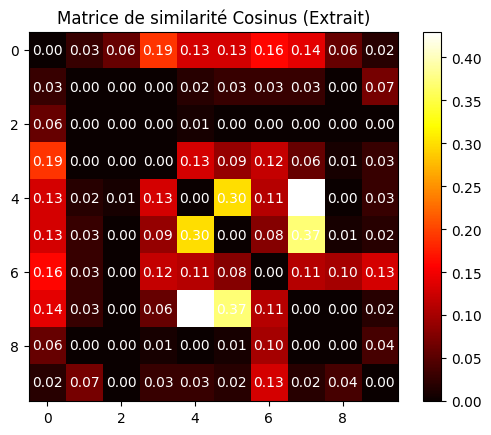

Matrice de similarité Jaccard : Dimension = (610, 610)


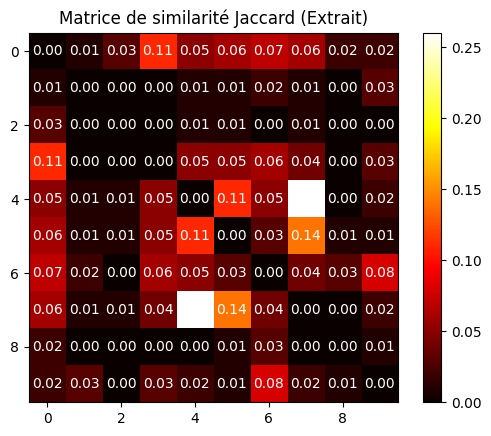

Matrice de similarité Pearson : Dimension = (610, 610)


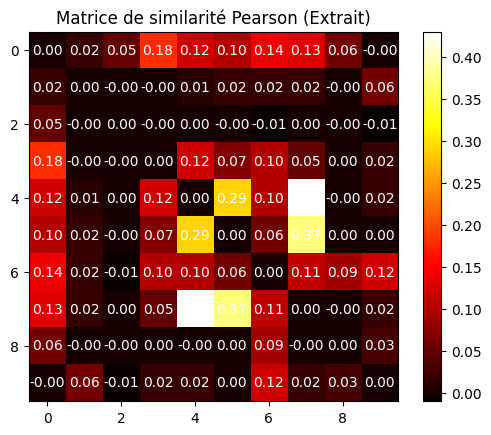

In [5]:
# Créer une sous-matrice CSR contenant uniquement les colonnes de notes
ratings_matrix = create_ratings_matrix(df_ratings)
# Calculer la matrice de similarité Cosinus et enregistrer les résultats
print("Calcul de la similarité Cosinus...")
cosine_sim = calculate_cosine_similarity(ratings_matrix)
# Calculer la matrice de similarité Jaccard et enregistrer les résultats
print("Calcul de la similarité Jaccard...")
jaccard_sim = compute_jaccard_similarity(ratings_matrix)
# Calculer la similarité Pearson uniquement pour les colonnes de notes
print("Calcul de la similarité Pearson...")
pearson_sim = compute_pearson_similarity(ratings_matrix)

# Enregistrer les matrices sur des fichiers textes
print("Exportation des matrices au format {.txt}...")
# cosine_similarity
np.savetxt(output_data + 'cosine_similarity.txt',
           cosine_sim, delimiter=',')
# jaccard_similarity
np.savetxt(output_data + 'jaccard_similarity.txt',
           jaccard_sim, delimiter=',')
# pearson_similarity
np.savetxt(output_data + 'pearson_similarity.txt',
           pearson_sim, delimiter=',')
print("Matrices enregistrées.")

# Aperçu des matrices calculées
print("Aperçu des matrices calculées :")
print(f"Matrice de similarité Cosinus : Dimension = {cosine_sim.shape}")
plt.imshow(cosine_sim[:10, :10], cmap='hot', interpolation='nearest')
for i in range(10):
    for j in range(10):
        plt.text(j, i, format(cosine_sim[i, j], ".2f"),
                 ha="center", va="center", color="white")
plt.title("Matrice de similarité Cosinus (Extrait)")
plt.colorbar()
plt.show()

print(f"Matrice de similarité Jaccard : Dimension = {jaccard_sim.shape}")
plt.imshow(jaccard_sim[:10, :10], cmap='hot', interpolation='nearest')
for i in range(10):
    for j in range(10):
        plt.text(j, i, format(jaccard_sim[i, j], ".2f"),
                 ha="center", va="center", color="white")
plt.title("Matrice de similarité Jaccard (Extrait)")
plt.colorbar()
plt.show()

print(f"Matrice de similarité Pearson : Dimension = {pearson_sim.shape}")
plt.imshow(pearson_sim[:10, :10], cmap='hot', interpolation='nearest')
for i in range(10):
    for j in range(10):
        plt.text(j, i, format(pearson_sim[i, j], ".2f"),
                 ha="center", va="center", color="white")
plt.title("Matrice de similarité Pearson (Extrait)")
plt.colorbar()
plt.show()


#### 1.3 - Création de la matrice de similarité finale en calculant la moyenne des trois similarités précédentes


- fonctions pour calculer la similarité finale et normalisée entre 1 et 2

In [6]:
# Fonction pour calculer la similarité finale moyenne des trois
def compute_final_similarity(cosine_sim, jaccard_sim, pearson_sim):
    # Vérification des dimensions et formes des matrices
    assert (cosine_sim.shape == jaccard_sim.shape == pearson_sim.shape
           ),"Les dimensions des matrices de similarité doivent être identiques."
    # Calcul de la moyenne des similarités
    final_sim = (cosine_sim + jaccard_sim + pearson_sim) / 3
    # Mettre la diagonale à 0 pour eviter la similarité avec soi-même
    rounded_final_sim = np.round(final_sim, 2)
    
    return rounded_final_sim

# Fonction de normalisation des valeurs de matrices entre deux bornes données
def normalize_similarity(final_similarity, a = 1, b = 2):
    # Calcul des valeurs minimales et maximales de la matrice de similarité
    min_val = np.min(final_similarity)
    max_val = np.max(final_similarity)
    # Normalisation de la matrice de similarité en utilisant np.interp
    normalized_similarity = np.interp(
        final_similarity, (min_val, max_val), (a, b))
    print(f"La matrice de similarité finale (normalisée)" 
          f" varie entre {a} et {b}.")
    
    return normalized_similarity


- calcul de la similarité finale

Calcul de la similarité finale...
La matrice de similarité finale (normalisée) varie entre 1 et 2.
Exportation de la matrice final_similarity
Matrice de similarité finale : Dimension = (610, 610)


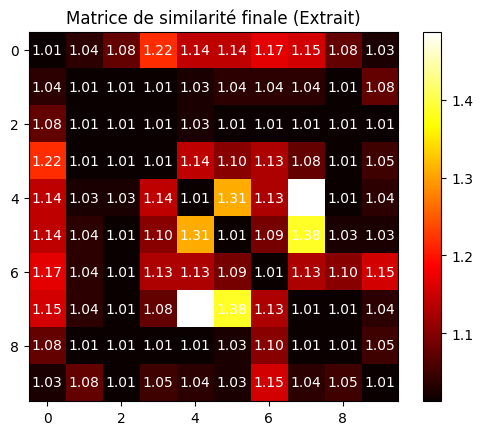

In [7]:
print("Calcul de la similarité finale...")
#la moyenne des trois similarités
final_similarity = compute_final_similarity(
    cosine_sim, jaccard_sim, pearson_sim)
# Normalisation des valeurs de final_similarity entre 1 et 2
final_similarity_norm = normalize_similarity(final_similarity)

# Enregistrer la matrice de similarité finale dans un fichier texte
print("Exportation de la matrice final_similarity")
np.savetxt(output_data + 'final_similarity.txt', 
           final_similarity_norm, delimiter=',')
# Afficher un aperçu de la matrice
print(f"Matrice de similarité finale : Dimension = {final_similarity_norm.shape}")
plt.imshow(final_similarity_norm[:10, :10], cmap='hot', interpolation='nearest')
for i in range(10):
    for j in range(10):
        plt.text(j, i, format(final_similarity_norm[i, j], ".2f"),
                 ha="center", va="center", color="white")
plt.title("Matrice de similarité finale (Extrait)")
plt.colorbar()
plt.show()


#### 1.4 - Supprimons aléatoirement 5 votes et affichons leurs valeurs de prédiction en utilisant la matrice de similarité finale

- fonctions de prédiction de valeurs d'évaluation et de construction de table à prédire en supprimant aléatoirement N valeurs

In [8]:
#fonction pour selectionner aléatoire N valeurs à supprimer pour prédir
def select_random_votes(df_ratings, n):
    #Sélectionne aléatoirement n votes à supprimer pour la prédiction.
    random_votes = df_ratings.sample(n, random_state=42)
    ratings_for_prediction = df_ratings.drop(random_votes.index)
    return random_votes, ratings_for_prediction

#fonction pour prédictir les valeurs d'évaluation
def predict_ratings(final_similarity, ratings_for_prediction, random_votes):
    #Prédit les évaluations manquantes en utilisant la matrice de similarité.

    # Dictionnaire pour stocker les évaluations par utilisateur et film
    ratings_dict = {}  
    for index, row in ratings_for_prediction.iterrows():
        user = int(row['userId'])
        item = row['movieId']
        rating = row['rating']

        if user not in ratings_dict:
            ratings_dict[user] = {}

        ratings_dict[user][item] = rating

    predicted_ratings = []

    for index, row in random_votes.iterrows():
        user = int(row['userId'])
        item = row['movieId']
        similarity_sum = 0
        weighted_sum = 0

        for other_user in range(1, final_similarity.shape[1] + 1):
            if other_user != user:
                similarity = final_similarity[user - 1, other_user - 1]

                if item in ratings_dict[other_user]:
                    rating = ratings_dict[other_user][item]
                    similarity_sum += similarity
                    weighted_sum += similarity * rating

        prediction =\
        weighted_sum / similarity_sum if similarity_sum != 0 else 0
        predicted_ratings.append(prediction)
    #prédiction dans une table de données
    df_predicted_ratings = random_votes.copy()
    df_predicted_ratings['rating'] = predicted_ratings
    df_predicted_ratings.rename(
        columns={'rating': 'rating_predicted'}, inplace=True)

    return df_predicted_ratings


- Sélection aléatoire de 5 votes à supprimer

In [9]:
# Sélection aléatoire de 5 votes à supprimer
random_votes, ratings_for_prediction= select_random_votes(df_ratings, 5)
# Affichage des votes sélectionnés
print("Votes sélectionnés à supprimer pour prédictions :")
random_votes

Votes sélectionnés à supprimer pour prédictions :


,userId,movieId,rating,timestamp
67037,432,77866,4.5,1335139641
42175,288,474,3.0,978465565
93850,599,4351,3.0,1498524542
6187,42,2987,4.0,996262677
12229,75,1610,4.0,1158989841


- valeurs de prédiction pour les votes supprimés

In [10]:
# Prédiction des valeurs supprimées en utilisant final_similarity
predictions = predict_ratings(
    final_similarity, ratings_for_prediction, random_votes)
# Affichage des valeurs de prédiction
print("Valeurs de prédiction pour les votes supprimés :")
predictions

Valeurs de prédiction pour les votes supprimés :


,userId,movieId,rating_predicted,timestamp
67037,432,77866,2.914634,1335139641
42175,288,474,3.654311,978465565
93850,599,4351,3.292647,1498524542
6187,42,2987,3.590139,996262677
12229,75,1610,3.934426,1158989841


#### 1.5 - Evaluons les trois similarités en termes de rappel (recall) et MAE (Mean Absolute Error) :

- fonction de calcul du MAE et du Rappel

In [11]:
# Fonction pour calculer le MAE
def calculate_mae(predictions, actual_ratings):
    # Calcul de l'erreur absolue entre les prédictions et les évaluations réelles
    errors = np.abs(predictions['rating_predicted'] - actual_ratings['rating'])
    # Calcul du MAE en prenant la moyenne des erreurs
    mae = np.mean(errors)
    # Arrondir le résultat à deux décimales
    rounded_mae = np.round(mae, 2)
    
    return rounded_mae

# Fonction pour calculer le Rappel (recall)
def calculate_recall(predictions, actual_ratings, k):
    # Tri des prédictions par ordre décroissant
    sorted_predictions = predictions.sort_values('rating_predicted', ascending=False)
    # Obtention des k premières prédictions triées
    top_k_userIds = sorted_predictions['userId'].head(k)
    # Ensemble des éléments pertinents
    denominator = actual_ratings[actual_ratings['rating'] >= 4]['rating'].sum()
    # Ensemble des éléments pertinents dans le top-k
    relevant_ratings = actual_ratings[
        (actual_ratings['userId'].isin(top_k_userIds)
        ) & (actual_ratings['rating'] >= 4)]
    numerator = relevant_ratings['rating'].sum()
    # Calcul du recall
    if denominator > 0 and numerator > 0:
        recall = numerator / denominator
    else:
        recall = 0
    #arrondir les valeurs à retourner
    rounded_recall = np.round(recall, 2)
    
    return rounded_recall


- évaluation des trois similarités en termes de rappel (recall) et MAE

In [12]:
# Sélection aléatoire de N des votes à supprimer pour évaluation
print("sélection aléatoire des votes à prédire pour évaluations...")
test_sample =10
random_votes_eval = df_ratings.sample(test_sample, random_state=42)
# Prédiction des valeurs supprimées pour évaluation
print("prédiction des votes supprimés pour évaluations ...")
predictions_cosine = predict_ratings(
    cosine_sim, ratings_for_prediction, random_votes)
predictions_jaccard = predict_ratings(
    jaccard_sim, ratings_for_prediction, random_votes)
predictions_pearson = predict_ratings(
    pearson_sim, ratings_for_prediction, random_votes)
# Calcul du MAE pour chaque similarité
print("calcul du MEA pour chaque matrice de similarité ...")
mae_cosine = calculate_mae(predictions_cosine, random_votes_eval)
mae_jaccard = calculate_mae(predictions_jaccard, random_votes_eval)
mae_pearson = calculate_mae(predictions_pearson, random_votes_eval)
# Calcul du recall pour chaque similarité
print("calcul du Recall pour chaque matrice de similarité ...")
k = 5
recall_cosine = calculate_recall(
    predictions_cosine, random_votes_eval, k)
recall_jaccard = calculate_recall(
    predictions_jaccard, random_votes_eval, k)
recall_pearson = calculate_recall(
    predictions_pearson, random_votes_eval, k)
print("fin de calcul pour évaluation.")

sélection aléatoire des votes à prédire pour évaluations...
prédiction des votes supprimés pour évaluations ...
calcul du MEA pour chaque matrice de similarité ...
calcul du Recall pour chaque matrice de similarité ...
fin de calcul pour évaluation.


- identification de la meilleure méthode entres les 3.

In [13]:
# Identification de la meilleure méthode
methods = ['Cosine', 'Jaccard', 'Pearson']
maes = [mae_cosine, mae_jaccard, mae_pearson]
recalls = [recall_cosine, recall_jaccard, recall_pearson]
#meilleur méthode
best_method = methods[np.argmin(maes)]
best_mae = np.min(maes)
best_recall = recalls[np.argmax(maes)]
print(f"Meilleure méthode : {best_method}")
print(f"MAE : {best_mae}")
print(f"Recall : {best_recall}")
# Tableau des valeurs d'évaluation
evaluation_table = {'Method': methods, 'MAE': maes, 'Recall': recalls}
pd.DataFrame(evaluation_table)

Meilleure méthode : Jaccard
MAE : 0.58
Recall : 0.6


,Method,MAE,Recall
0,Cosine,0.61,0.6
1,Jaccard,0.58,0.6
2,Pearson,0.60,0.6


### Projet DMA - Partie 2 : 

#### 2.1. calcule et comparaison de la densité des graphes des trois matrices de similarité

- fonction pour calculer la densité d'un graphe à partir d'une matrice de similarité

In [31]:
# Fonction pour calculer la densité d'un graphe
def calculate_graph_density(similarity_matrix):
    # Conversion de la matrice de similarité en graphe non orienté
    graph = nx.from_numpy_array(similarity_matrix)
    # Calcul de la densité du graphe
    density = nx.density(graph)

    return density

# Fonction pour comparer la densité des graphes et avoir un aperçu
def visualize_and_compare_densities(similarity_matrices, similarity_labels):
    densities = [calculate_graph_density(similarity_matrix) for similarity_matrix in similarity_matrices]

    # Comparaison des densités
    max_density = max(densities)
    max_density_label = similarity_labels[densities.index(max_density)]
    density_df = pd.DataFrame({"Similarité": similarity_labels, 
                               "Densité du graphe": densities})

    # Affichage des graphiques individuels de densité
    print("Aperçu des graphes des matrices de similarité pour"
          f" mise en perspective avec les calculs de densités: ")
    fig, axs = plt.subplots(1, len(similarity_matrices), figsize=(12, 4))
    for i, similarity_matrix in enumerate(similarity_matrices):
        graph = nx.from_numpy_array(similarity_matrix)
        pos = nx.spring_layout(graph)
        nx.draw_networkx(graph, pos=pos, with_labels=False, 
                         node_size=100, alpha=0.7, ax=axs[i])
        axs[i].set_title(f"Graphe de Similarité '{similarity_labels[i]}'")
        axs[i].axis('off')

    # Affichage du graphique de comparaison des densités
    plt.figure(figsize=(5, 2))
    plt.bar(similarity_labels, densities)
    plt.xlabel("Similarité")
    plt.ylabel("Densité du graphe")
    plt.title("Comparaison des Densités des Graphes de Similarités")

    # Vérification de la différence de densité significative
    if len(densities) >= 2:
        diff_density = max_density - min(densities)
        if diff_density > 0.1:
            plt.text(0.5, -0.2, "Différence de densité significative", 
                     horizontalalignment='center',
                     verticalalignment='center', 
                     transform=plt.gca().transAxes)
    plt.show()
    print(f"\nLe graphe de similarité '{max_density_label}' a la plus grande densité de graphe.")
    
    print("Tableau de valeurs des densités calculées : ")
    return density_df


- calcul et comparaison de la densité des graphes des similarités

Aperçu des graphes des matrices de similarité pour mise en perspective avec les calculs de densités: 


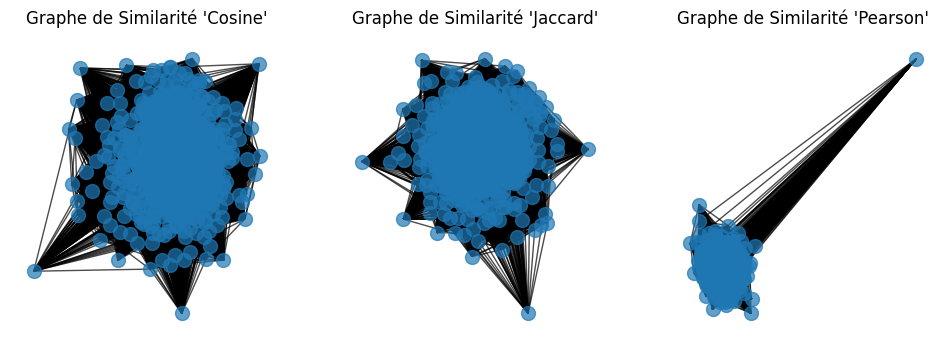

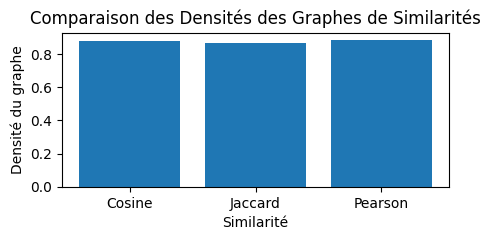


Le graphe de similarité 'Pearson' a la plus grande densité de graphe.
Tableau de valeurs des densités calculées : 


,Similarité,Densité du graphe
0,Cosine,0.877596
1,Jaccard,0.866317
2,Pearson,0.885741


In [32]:
# Liste des matrices de similarité
similarity_matrices = [cosine_sim, jaccard_sim, pearson_sim]
# Liste des étiquettes de similarité correspondantes
similarity_labels = ["Cosine", "Jaccard", "Pearson"]
# Visualisation et comparaison des densités
visualize_and_compare_densities(similarity_matrices, similarity_labels)

#### 2.2 Utilisation du graphe généré par la matrice de similarité finale (final_similarity)

- fonction pour avoir un aperçu de la fonction de similarité avec coloration de communauté

In [36]:
# Fonction d'aperçu de la fonction de similarité finale
def visualize_similarity_graph(graph_sim):
    # Détection des communautés dans le graphe avec l'algorithme de Louvain
    partition = community_louvain.best_partition(graph_sim)

    # Couleurs pour chaque communauté
    colors = [partition[node] for node in graph_sim.nodes()]

    # Affichage du graphe avec les points colorés selon la communauté
    plt.figure(figsize=(4, 4))
    pos = nx.spring_layout(graph_sim, seed=42)
    nx.draw_networkx(graph_sim, pos=pos, with_labels=False,
                     node_color=colors, node_size=100, alpha=0.7)
    plt.title(f'Aperçu du graphe non orienté généré à partir de la matrice '
              f'finale de similarité (avec détection des communautés)')
    plt.axis('off')
    plt.show()


- génération de graphe par la matrice finale de similarité Final_Similarity

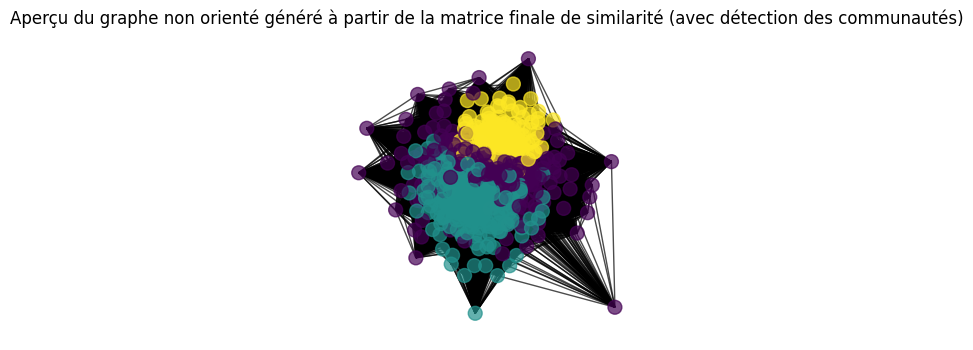

In [38]:
# Conversion de la matrice finale de similarité en graphe non orienté
graph_sim = nx.from_numpy_array(final_similarity)
# Utilisation de la fonction pour visualiser le graphe de similarité
visualize_similarity_graph(graph_sim)

#### 2.2.1 - Identification des 5 utilisateurs leaders ayant le maximum de voisins

- fonction pour  l'identification des utilisateurs leaders ayant le maximum de voisins dans le graphe

In [39]:
# fonction pour l'identification des utilisateurs leaders ayant le maximum de voisins
def find_top_users_leaders(graph_sim, num_leaders=5):
    leaders = sorted(graph_sim.degree, 
                     key=lambda x: x[1], reverse=True)[:num_leaders]
    
    return leaders

#fonction pour l'aperçu visuel des utilisateurs leaders
def visualize_leader_subgraph(graph, num_leaders=5):
    # Identification des utilisateurs leaders avec leurs voisins
    leaders = find_top_users_leaders(graph, num_leaders=num_leaders)
    # Affichage des utilisateurs leaders avec leurs voisins
    print("Les 5 utilisateurs leaders ayant le maximum de voisins :")
    leaders_df = pd.DataFrame(leaders, columns=["Utilisateur", "Nb Voisins"])
    print(leaders_df)
    # Création d'un sous-graphe avec les utilisateurs leaders et leurs voisins
    leader_nodes = [leader[0] for leader in leaders]
    subgraph_leaders = graph.subgraph(leader_nodes)
    # Nombre de voisins pour chaque nœud
    num_neighbors = {node: graph.degree[node] for node in leader_nodes}
    # Affichage du sous-graphe des utilisateurs leaders avec les nombres de voisins
    plt.figure(figsize=(4, 4))
    pos = nx.spring_layout(subgraph_leaders, seed=42)
    nx.draw_networkx(subgraph_leaders, pos=pos, with_labels=True, node_size=200, alpha=0.7)
    plt.title(f"Sous-graphe des Utilisateurs Leaders ({num_neighbors[leader_nodes[0]]} voisins)")
    plt.axis('off')
    plt.show()


- identifier les 5 utilisateurs leaders

Les 5 utilisateurs leaders ayant le maximum de voisins :
   Utilisateur  Nb Voisins
0           67         609
1          413         609
2          598         609
3          176         608
4          273         607


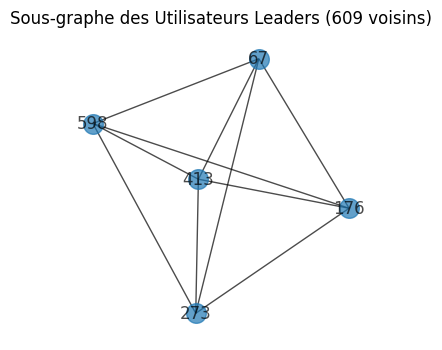

In [42]:
# identification des utilisateurs leaders (avec un aperçu visuel du sousgraph)
visualize_leader_subgraph(graph_sim, num_leaders=5)

#### 2.2.2 - Identification des 5 utilisateurs connecteurs qui relient le maximum de communautés :

- fonction pour  l'identification des utilisateurs connecteurs qui relient le maximum de communautés dans le graphe.

In [20]:
#fonction pour identifier les utilisateurs connecteurs
def find_top_users_connectors(graph, num_connectors=5):
    # Identification des utilisateurs connecteurs reliant le maximum de communautés
    connectors = sorted(
        nx.betweenness_centrality(graph).items(), 
        key=lambda x: x[1], reverse=True)[:num_connectors]
    
    return connectors

#fonction pour l'aperçu visuel des utilisateurs  connecteurs
def visualize_connector_subgraph(graph, num_connectors=5):
    # Identification des utilisateurs connecteurs reliant le maximum de communautés
    connectors = find_top_users_connectors(graph, num_connectors=num_connectors)
    # Affichage des utilisateurs leaders avec leurs voisins
    print("Les 5 utilisateurs connecteurs reliant le maximum de communautés :")
    connectors_df = pd.DataFrame(connectors, columns=["Utilisateurs", "Coef de centralité"])
    print(connectors_df)
    # Création d'un sous-graphe avec les utilisateurs connecteurs et leurs voisins
    connector_nodes = [connector[0] for connector in connectors]
    subgraph_connectors = graph.subgraph(connector_nodes)
    # Calcul des coefficients de centralité des utilisateurs connecteurs
    centrality = {nodes: centrality for nodes, centrality in connectors}
    # Affichage du sous-graphe des utilisateurs connecteurs avec les arêtes
    plt.figure(figsize=(4, 4))
    pos = nx.spring_layout(subgraph_connectors, seed=42)
    # Affichage des arêtes du sous-graphe
    nx.draw_networkx_edges(subgraph_connectors, pos, width=1.0, alpha=0.7)
    # Affichage des nœuds avec l'étiquette de l'identifiant utilisateur
    nx.draw_networkx_nodes(subgraph_connectors, pos, node_size=300, alpha=0.8)
    nx.draw_networkx_labels(subgraph_connectors, pos, font_size=8, font_color='black')
    # Formatage et affichage des coefficients de centralité au-dessus des nœuds
    for node, (x, y) in pos.items():
        # Formatage en notation scientifique
        centrality_value = f"Centrality: {centrality[node]:.2e}"  
        plt.text(x, y + 0.05, centrality_value, ha='center', fontsize=8)
    plt.title(f"Sous-graphe des Utilisateurs Connecteurs ({num_connectors} connecteurs)")
    plt.axis('off')
    plt.show()

- identifier les 5 utilisateurs connecteurs

Les 5 utilisateurs connecteurs reliant le maximum de communautés :
   Utilisateurs  Coef de centralité
0            67            0.000478
1           413            0.000478
2           598            0.000478
3           176            0.000468
4           605            0.000461


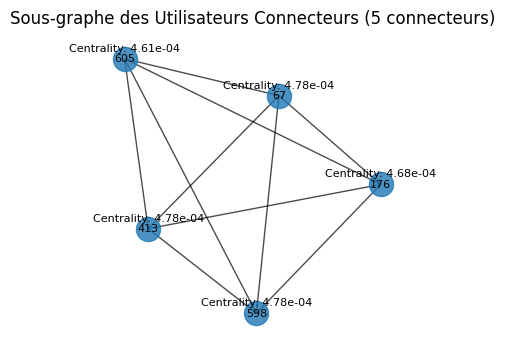

In [21]:
# Utilisation de la fonction pour visualiser le sous-graphe des utilisateurs connecteurs
visualize_connector_subgraph(graph_sim, num_connectors=5)

#### 2.2.3 - Identification des 5 meilleures relations par lesquelles les informations circulent d'une communauté à une autre :

- fonction pour  l'identification des meilleures relations par lesquelles les informations circulent d'une communauté à une autre

In [22]:
def find_top_information_flow(graph, num_relations=5):
    # Calculer les coefficients de centralité pour toutes les arêtes du graphe
    edge_centralities = nx.edge_betweenness_centrality(graph)
    
    # Trier les arêtes par coefficient de centralité décroissant
    sorted_edges = sorted(edge_centralities.items(), key=lambda x: x[1], reverse=True)
    
    # Récupérer les 5 meilleures relations
    top_relations = sorted_edges[:num_relations]
    
    return top_relations

def visualize_information_flow_subgraph(graph, num_relations=5):
    # Sous-graphe des 5 meilleures relations d'information
    subgraph = nx.DiGraph()

    # Identifier les 5 meilleures relations d'information
    top_relations = find_top_information_flow(graph, num_relations=num_relations)

    # Affichage des utilisateurs leaders avec leurs voisins
    print("Les 5 meilleures relations d'information :")
    top_relations_df = pd.DataFrame(top_relations, columns=["Relations Utilisateurs", "Coef de centralité"])
    print(top_relations_df)

    # Ajouter les arêtes et les nœuds correspondants aux meilleures relations
    for edge, centrality in top_relations:
        source, target = edge
        if source in graph.nodes() and target in graph.nodes():
            subgraph.add_edge(source, target)
            subgraph.edges[source, target]['centrality'] = centrality

    # Détecter les communautés dans le sous-graphe
    communities = nx.algorithms.community.greedy_modularity_communities(subgraph)
    community_colors = {}
    for i, community in enumerate(communities):
        for node in community:
            community_colors[node] = i

    # Affichage du sous-graphe avec étiquettes, couleurs de communauté et coefficient de centralité
    plt.figure(figsize=(10, 6))
    pos = nx.spring_layout(subgraph)

    # Dessiner les nœuds avec les étiquettes et les couleurs de communauté
    node_labels = nx.get_node_attributes(subgraph, 'userId')
    node_colors = [community_colors[node] for node in subgraph.nodes()]
    nx.draw_networkx_nodes(subgraph, pos=pos,
                           node_color=node_colors, node_size=300, alpha=0.8)
    nx.draw_networkx_labels(subgraph, pos=pos,
                            labels=node_labels, font_size=8, font_color='black')

    # Dessiner les arêtes avec les couleurs de communauté correspondantes et afficher le coefficient de centralité
    for edge in subgraph.edges():
        centrality = subgraph.edges[edge]['centrality']
        edge_color = community_colors[edge[0]]
        nx.draw_networkx_edges(subgraph, pos=pos,
                               edgelist=[edge], edge_color=str(edge_color), alpha=0.7)
        if 'userId' in subgraph.nodes[edge[0]]:
            source_user = subgraph.nodes[edge[0]]['userId']
        else:
            source_user = edge[0]
        if 'userId' in subgraph.nodes[edge[1]]:
            target_user = subgraph.nodes[edge[1]]['userId']
        else:
            target_user = edge[1]
        plt.text((pos[edge[0]][0] + pos[edge[1]][0]) / 2, (pos[edge[0]][1] + pos[edge[1]][1]) / 2,
                 f"Centrality: {centrality:.2e}\n{source_user} -> {target_user}", ha='center', fontsize=8)

    plt.title("Sous-graphe des Meilleures Relations d'Information")
    plt.axis('off')
    plt.show()



- identifier les 5 utilisateurs connecteurs

Les 5 meilleures relations d'information :
  Relations Utilisateurs  Coef de centralité
0             (174, 598)             0.00005
1              (67, 174)             0.00005
2             (174, 413)             0.00005
3             (174, 479)             0.00005
4             (174, 176)             0.00005


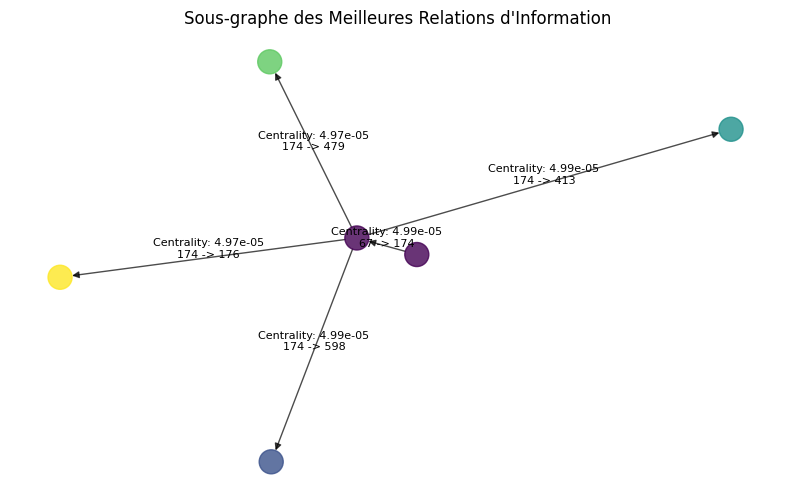

In [44]:
# Visualisation du sous-graphe des meilleures relations d'information
visualize_information_flow_subgraph(graph_sim)

#### 2.2.4 - Identification du plus petit ensemble de films qui permettent d'atteindre tous les genres et styles que l'utilisateur a déjà regardés :

#### 2.2.e - Identification de l'ensemble de films qui n'ont jamais été recommandés ensemble :

#### 2.2.f - Recommandation d'un film à un utilisateur en s'assurant que les films recommandés appartiennent à différents types :

### Partie 3 :

Dans cette section, la matrice des résultats a été importée dans les logiciels de visualisation des réseaux sociaux Gephi et SocNetV, les graphiques générés et les communautés de ces graphiques dans les deux logiciels ont été sauvegardés et sont visualisés ci-après.

In [24]:
#Exporté le résultat
nx.write_gexf(graph_sim, output_data+"final_similarity_matrix.gexf")

#### 3.1 - Imporation de la matrice résultat sur les deux logiciels de visualisation de réseaux sociaux GEPHI et SocNetV et le graphe généré :

- graphe généré sur GEPHI

- graphe généré sur SocNetV

#### 3.1 - Communautés des graphe généré sur GEPHI et SocNetV :

- communautés sur GEPHI

- communautés sur SocNetV

### Conclusion :